In [1]:
import findspark 
findspark.init()
import pyspark
findspark.find()


'C:\\spark\\spark-3.2.0-bin-hadoop3.2'

In [2]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession

conf = pyspark.SparkConf().setAppName('MyApp-3').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

spark


In [3]:

file_data  = spark.read.csv(r'D:\Code_Place\Data-Science\Scikit Learn\dataset_3\iot_log_db.csv', inferSchema=True,header=True)
file_data.printSchema()


root
 |-- src_zb_addr: string (nullable = true)
 |-- dst_zb_addr: string (nullable = true)
 |-- start_time: integer (nullable = true)
 |-- stop_time: integer (nullable = true)
 |-- duration: double (nullable = true)
 |-- number_of_packets: integer (nullable = true)
 |-- min_size: integer (nullable = true)
 |-- max_size: integer (nullable = true)
 |-- average_size: double (nullable = true)
 |-- total_bytes_a: integer (nullable = true)
 |-- total_bytes_b: integer (nullable = true)
 |-- sum_size: integer (nullable = true)
 |-- packets_a: integer (nullable = true)
 |-- packets_b: integer (nullable = true)
 |-- connect: integer (nullable = true)



In [9]:
file_data.count()

27385

In [10]:
file_data.head(5)

[Row(src_zb_addr='1ba29f32', dst_zb_addr='c08a1bf5', start_time=1570732037.00045, stop_time=1570732037.000664, duration=0.00021409988403320312, number_of_packets=4, min_size=34, max_size=43, average_size=38.5, total_bytes_a=86, total_bytes_b=68, sum_size=154, packets_a=2, packets_b=2),
 Row(src_zb_addr='1ba29f32', dst_zb_addr='c08a1bf5', start_time=1570732043.000543, stop_time=1570732043.000922, duration=0.0003788471221923828, number_of_packets=6, min_size=35, max_size=52, average_size=41.333333333333336, total_bytes_a=178, total_bytes_b=70, sum_size=248, packets_a=4, packets_b=2),
 Row(src_zb_addr='c08a1bf5', dst_zb_addr='1ba29f32', start_time=1570732046.00077, stop_time=1570732046.000778, duration=7.867813110351562e-06, number_of_packets=2, min_size=36, max_size=36, average_size=36.0, total_bytes_a=72, total_bytes_b=0, sum_size=72, packets_a=2, packets_b=0),
 Row(src_zb_addr='c08a1bf5', dst_zb_addr='1ba29f32', start_time=1570732047.00086, stop_time=1570732047.000867, duration=6.91413

In [7]:
from pyspark.sql.functions import col, skewness, kurtosis
trans_data.select(skewness('_c0'),kurtosis('_c0')).show()

In [11]:
file_data.describe().show()

+-------+-----------+-----------+--------------------+--------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+--------------------+
|summary|src_zb_addr|dst_zb_addr|          start_time|           stop_time|            duration|number_of_packets|          min_size|          max_size|      average_size|     total_bytes_a|     total_bytes_b|          sum_size|        packets_a|           packets_b|
+-------+-----------+-----------+--------------------+--------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+--------------------+
|  count|      27385|      27385|               27385|               27385|               27385|            27385|             27385|             27385|             27385|             27385|      

In [4]:
import numpy as np
import pandas as pd
df_main = file_data.toPandas()
df_main.head()

,src_zb_addr,dst_zb_addr,start_time,stop_time,duration,number_of_packets,min_size,max_size,average_size,total_bytes_a,total_bytes_b,sum_size,packets_a,packets_b,connect
0,1ba29f32,c08a1bf5,1570732037,1570732037,0.000214,4,34,43,38.500000,86,68,154,2,2,1
1,1ba29f32,c08a1bf5,1570732043,1570732043,0.000379,6,35,52,41.333333,178,70,248,4,2,1
2,c08a1bf5,1ba29f32,1570732046,1570732046,0.000008,2,36,36,36.000000,72,0,72,2,0,1
3,c08a1bf5,1ba29f32,1570732047,1570732047,0.000007,2,33,33,33.000000,66,0,66,2,0,1
4,1ba29f32,c08a1bf5,1570732049,1570732050,0.999161,6,39,57,49.666667,192,106,298,4,2,1


In [5]:
df_main = df_main.fillna(0)

In [6]:
df = df_main.copy()
df.dtypes

src_zb_addr           object
dst_zb_addr           object
start_time             int32
stop_time              int32
duration             float64
number_of_packets      int32
min_size               int32
max_size               int32
average_size         float64
total_bytes_a          int32
total_bytes_b          int32
sum_size               int32
packets_a              int32
packets_b              int32
connect                int32
dtype: object

In [7]:
df['src_zb_addr'] = pd.Categorical(df['src_zb_addr'])
df['src_zb_addr'] = df.src_zb_addr.cat.codes
df['dst_zb_addr'] = pd.Categorical(df['dst_zb_addr'])
df['dst_zb_addr'] = df.dst_zb_addr.cat.codes
df['start_time'] = pd.Categorical(df['start_time'])
df['start_time'] = df.start_time.cat.codes
df['stop_time'] = pd.Categorical(df['stop_time'])
df['stop_time'] = df.stop_time.cat.codes
df['duration'] = pd.Categorical(df['duration'])
df['duration'] = df.duration.cat.codes
df['average_size'] = pd.Categorical(df['average_size'])
df['average_size'] = df.average_size.cat.codes


In [9]:
df['LS'] = pd.Categorical(df['LS'])
df['LS'] = df.LS.cat.codes
df['IAI'] = pd.Categorical(df['IAI'])
df['IAI'] = df.IAI.cat.codes
df['Country'] = pd.Categorical(df['Country'])
df['Country'] = df.Country.cat.codes



In [10]:
df.head()

,src_zb_addr,dst_zb_addr,start_time,stop_time,duration,number_of_packets,min_size,max_size,average_size,total_bytes_a,total_bytes_b,sum_size,packets_a,packets_b,connect
0,0,4,0,0,212,4,34,43,9,86,68,154,2,2,1
1,0,4,1,1,307,6,35,52,31,178,70,248,4,2,1
2,4,0,2,2,4,2,36,36,4,72,0,72,2,0,1
3,4,0,3,3,2,2,33,33,0,66,0,66,2,0,1
4,0,4,4,4,676,6,39,57,36,192,106,298,4,2,1


In [11]:
# df['LS'] = pd.Categorical(df['LS']).apply(int)
df.dtypes

src_zb_addr           int8
dst_zb_addr           int8
start_time           int16
stop_time            int16
duration             int16
number_of_packets    int32
min_size             int32
max_size             int32
average_size          int8
total_bytes_a        int32
total_bytes_b        int32
sum_size             int32
packets_a            int32
packets_b            int32
connect              int32
dtype: object

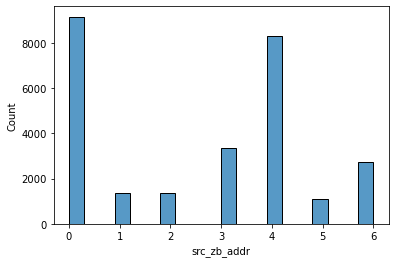

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style="darkgrid")
# trans_data = sns.load_dataset("iris")

sns.histplot(data=df, x="src_zb_addr", bins=20)
plt.show()

array([[<AxesSubplot:title={'center':'src_zb_addr'}>,
        <AxesSubplot:title={'center':'dst_zb_addr'}>,
        <AxesSubplot:title={'center':'total_bytes_a'}>],
       [<AxesSubplot:title={'center':'total_bytes_b'}>,
        <AxesSubplot:title={'center':'sum_size'}>,
        <AxesSubplot:title={'center':'packets_a'}>],
       [<AxesSubplot:title={'center':'packets_b'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

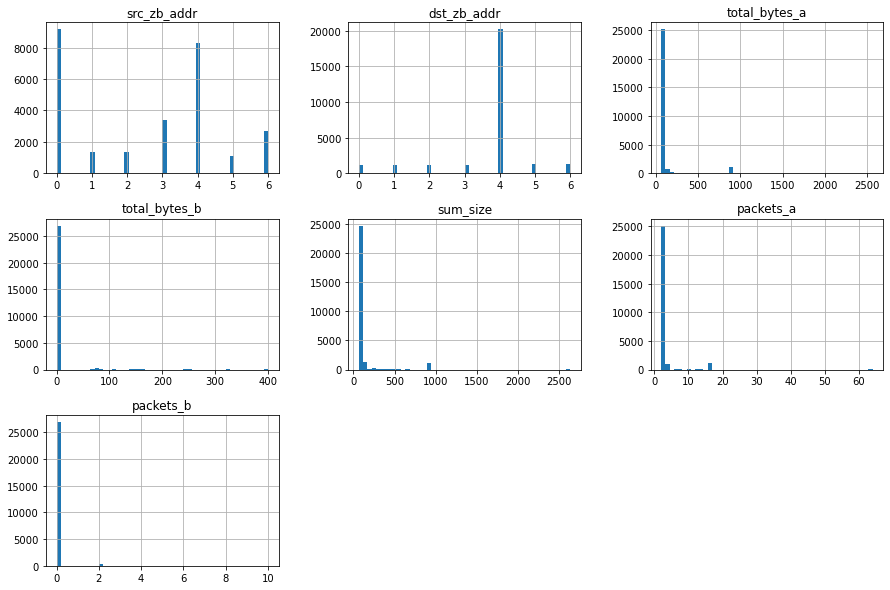

In [22]:

clist = ['src_zb_addr', 'dst_zb_addr','total_bytes_a', 'total_bytes_b', 'sum_size', 'packets_a', 'packets_b']
df_hist = df[clist]
df_hist.hist(bins=50, figsize=(15,10))


In [12]:
# df['Status'] = 0
df.columns

Index(['src_zb_addr', 'dst_zb_addr', 'start_time', 'stop_time', 'duration',
       'number_of_packets', 'min_size', 'max_size', 'average_size',
       'total_bytes_a', 'total_bytes_b', 'sum_size', 'packets_a', 'packets_b',
       'connect'],
      dtype='object')

In [13]:
numaric_call = ['src_zb_addr', 'dst_zb_addr', 'start_time', 'stop_time', 'duration',
       'number_of_packets', 'min_size', 'max_size', 'average_size',
       'total_bytes_a', 'total_bytes_b', 'sum_size', 'packets_a', 'packets_b',
       'connect'
       ]
data = df[numaric_call]
data.head()

,src_zb_addr,dst_zb_addr,start_time,stop_time,duration,number_of_packets,min_size,max_size,average_size,total_bytes_a,total_bytes_b,sum_size,packets_a,packets_b,connect
0,0,4,0,0,212,4,34,43,9,86,68,154,2,2,1
1,0,4,1,1,307,6,35,52,31,178,70,248,4,2,1
2,4,0,2,2,4,2,36,36,4,72,0,72,2,0,1
3,4,0,3,3,2,2,33,33,0,66,0,66,2,0,1
4,0,4,4,4,676,6,39,57,36,192,106,298,4,2,1


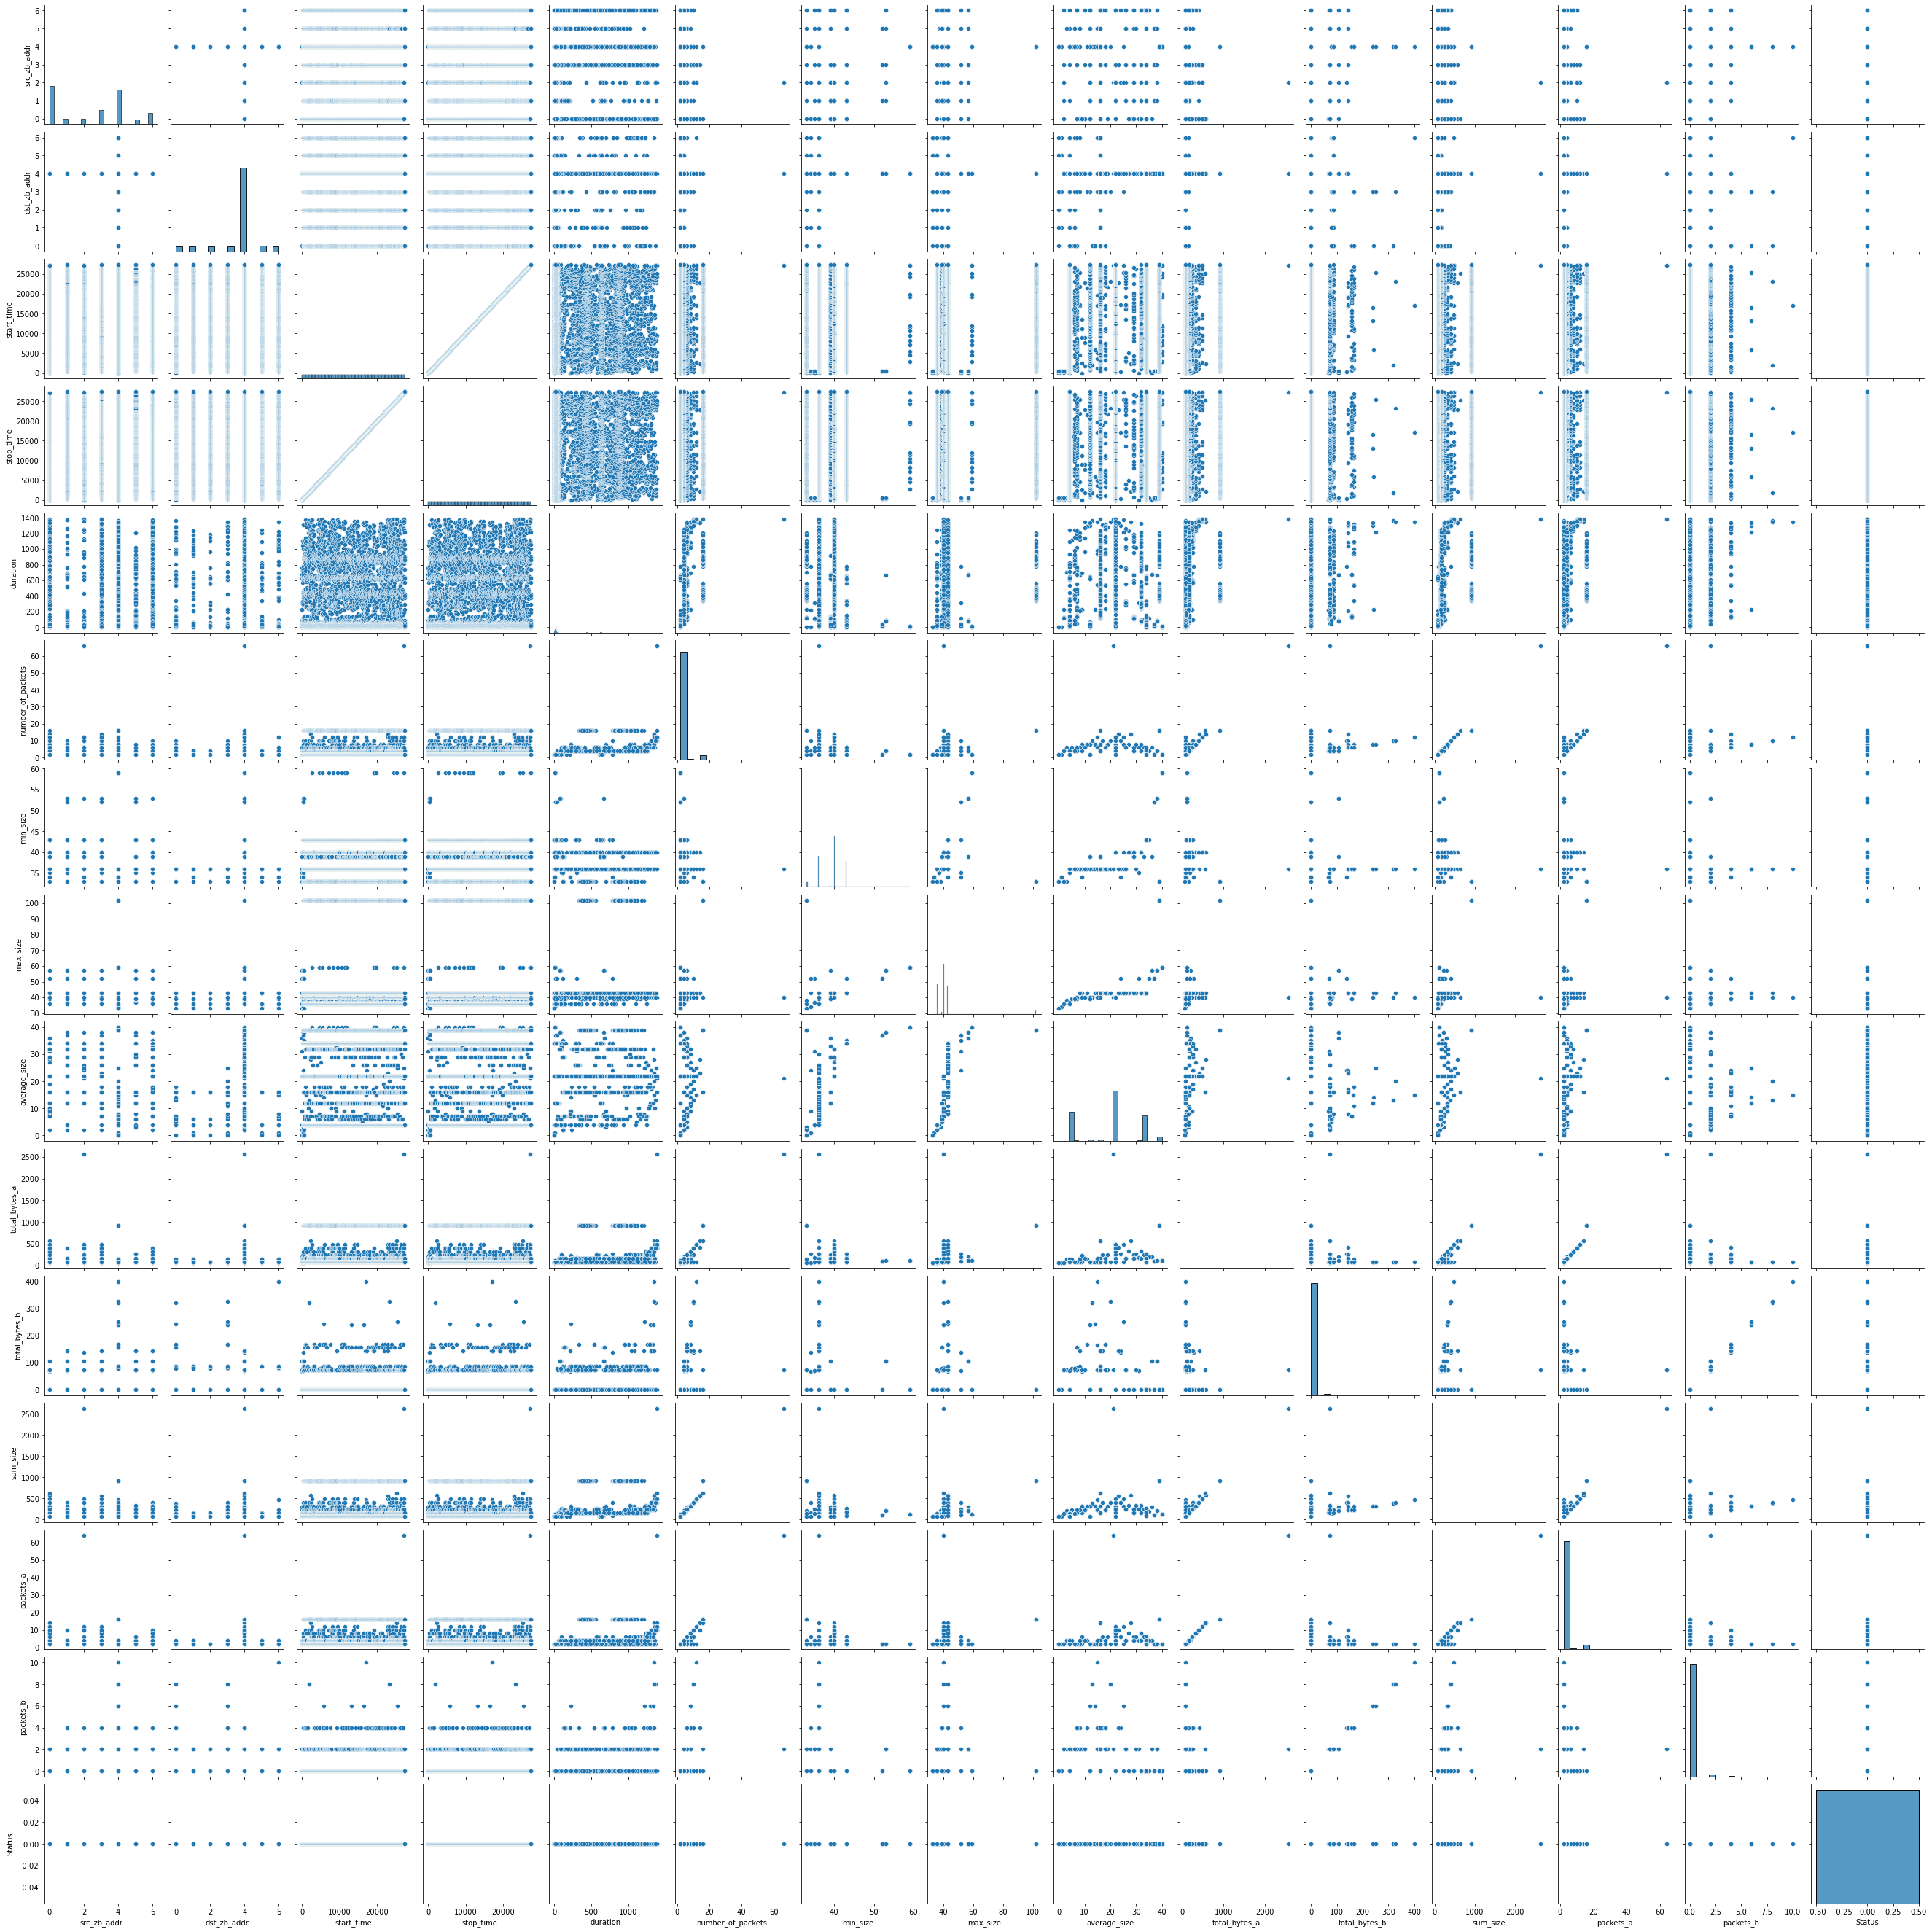

In [26]:
sns.pairplot(data=data)

In [14]:
dataset = data.copy()
dataset.isna().sum()

src_zb_addr          0
dst_zb_addr          0
start_time           0
stop_time            0
duration             0
number_of_packets    0
min_size             0
max_size             0
average_size         0
total_bytes_a        0
total_bytes_b        0
sum_size             0
packets_a            0
packets_b            0
connect              0
dtype: int64

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='packets_b', ylabel='Density'>

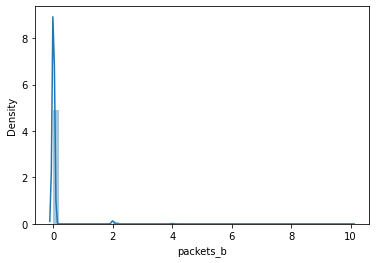

In [30]:
sns.distplot(dataset['packets_b'])

In [31]:
dataset.corr()

,src_zb_addr,dst_zb_addr,start_time,stop_time,duration,number_of_packets,min_size,max_size,average_size,total_bytes_a,total_bytes_b,sum_size,packets_a,packets_b,Status
src_zb_addr,1.000000,-0.168558,0.086043,0.086043,0.022680,0.126233,-0.295671,0.088477,-0.220591,0.118478,0.080039,0.124154,0.117860,0.081289,NaN
dst_zb_addr,-0.168558,1.000000,-0.011369,-0.011369,0.050881,0.049972,0.278884,0.115999,0.344783,0.065262,-0.062704,0.060544,0.056775,-0.058821,NaN
start_time,0.086043,-0.011369,1.000000,1.000000,0.013565,0.013668,-0.029178,0.003545,-0.022669,0.009597,0.020491,0.011086,0.011267,0.022237,NaN
stop_time,0.086043,-0.011369,1.000000,1.000000,0.013568,0.013669,-0.029178,0.003545,-0.022669,0.009598,0.020492,0.011087,0.011268,0.022238,NaN
duration,0.022680,0.050881,0.013565,0.013568,1.000000,0.645332,-0.229810,0.495372,0.195811,0.585272,0.239843,0.601887,0.622298,0.237759,NaN
number_of_packets,0.126233,0.049972,0.013668,0.013669,0.645332,1.000000,-0.438064,0.939793,0.316734,0.989211,0.101356,0.994959,0.993866,0.102548,NaN
min_size,-0.295671,0.278884,-0.029178,-0.029178,-0.229810,-0.438064,1.000000,-0.257279,0.680937,-0.407526,-0.126927,-0.416151,-0.425747,-0.131542,NaN
max_size,0.088477,0.115999,0.003545,0.003545,0.495372,0.939793,-0.257279,1.000000,0.509195,0.968971,0.000320,0.967331,0.944788,-0.000401,NaN
average_size,-0.220591,0.344783,-0.022669,-0.022669,0.195811,0.316734,0.680937,0.509195,1.000000,0.357135,-0.063240,0.351876,0.325667,-0.065346,NaN
total_bytes_a,0.118478,0.065262,0.009597,0.009598,0.585272,0.989211,-0.407526,0.968971,0.357135,1.000000,-0.013410,0.997299,0.995835,-0.012718,NaN


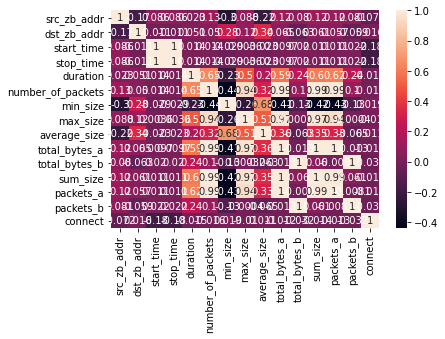

In [17]:
sns.heatmap(dataset.corr(),annot=True).figsize=(20,25)

In [18]:
data.columns

Index(['src_zb_addr', 'dst_zb_addr', 'start_time', 'stop_time', 'duration',
       'number_of_packets', 'min_size', 'max_size', 'average_size',
       'total_bytes_a', 'total_bytes_b', 'sum_size', 'packets_a', 'packets_b',
       'connect'],
      dtype='object')

In [19]:
X= data[['src_zb_addr', 'dst_zb_addr', 'start_time', 'stop_time', 'duration',
       'number_of_packets', 'min_size', 'max_size', 'average_size',
       'total_bytes_a', 'total_bytes_b', 'sum_size', 'packets_a', 'packets_b'
       ]]
y = data['connect']

In [20]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((19169, 14), (8216, 14))

In [21]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [22]:
print("Find Constant and Non-Constant Features:\n",var_thres.get_support())
print("No. of Non-Constant Features: ",len(X_train.columns[var_thres.get_support()]))

Find Constant and Non-Constant Features:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
No. of Non-Constant Features:  14


In [23]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

0


In [24]:
X_train=X_train.drop(constant_columns,axis=1)
X_test=X_test.drop(constant_columns,axis=1)

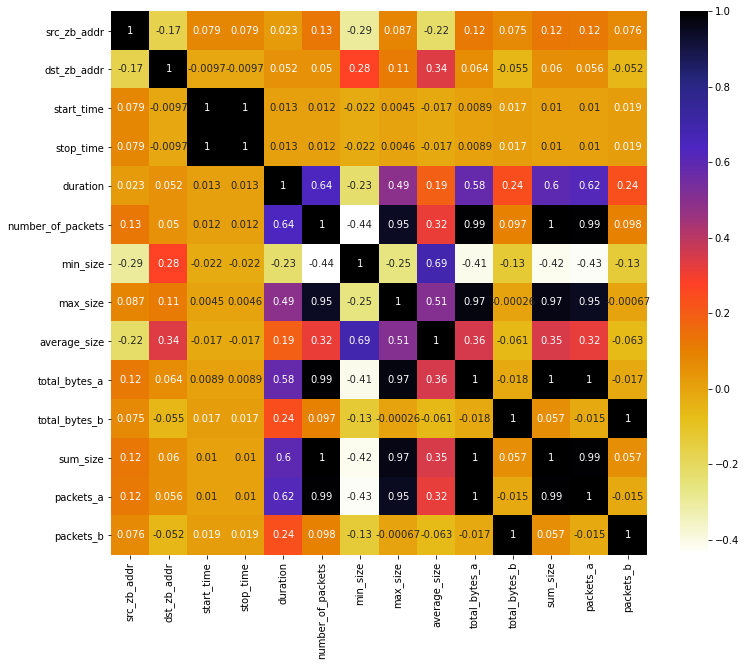

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [26]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(X_train, 0.7)
print("No. of Correlation Features:",len(set(corr_features)))
corr_features


No. of Correlation Features: 6


{'max_size',
 'packets_a',
 'packets_b',
 'stop_time',
 'sum_size',
 'total_bytes_a'}

In [28]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [29]:
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

binary


In [30]:
utils.multiclass.type_of_target(X_train.astype('int'))
utils.multiclass.type_of_target(y_train.astype('int'))

'binary'

In [31]:
mp=10
X_train.head(2)

,src_zb_addr,dst_zb_addr,start_time,duration,number_of_packets,min_size,average_size,total_bytes_b
3452,4,2,3113,26,2,36,4,0
4142,4,0,3706,25,2,36,4,0


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

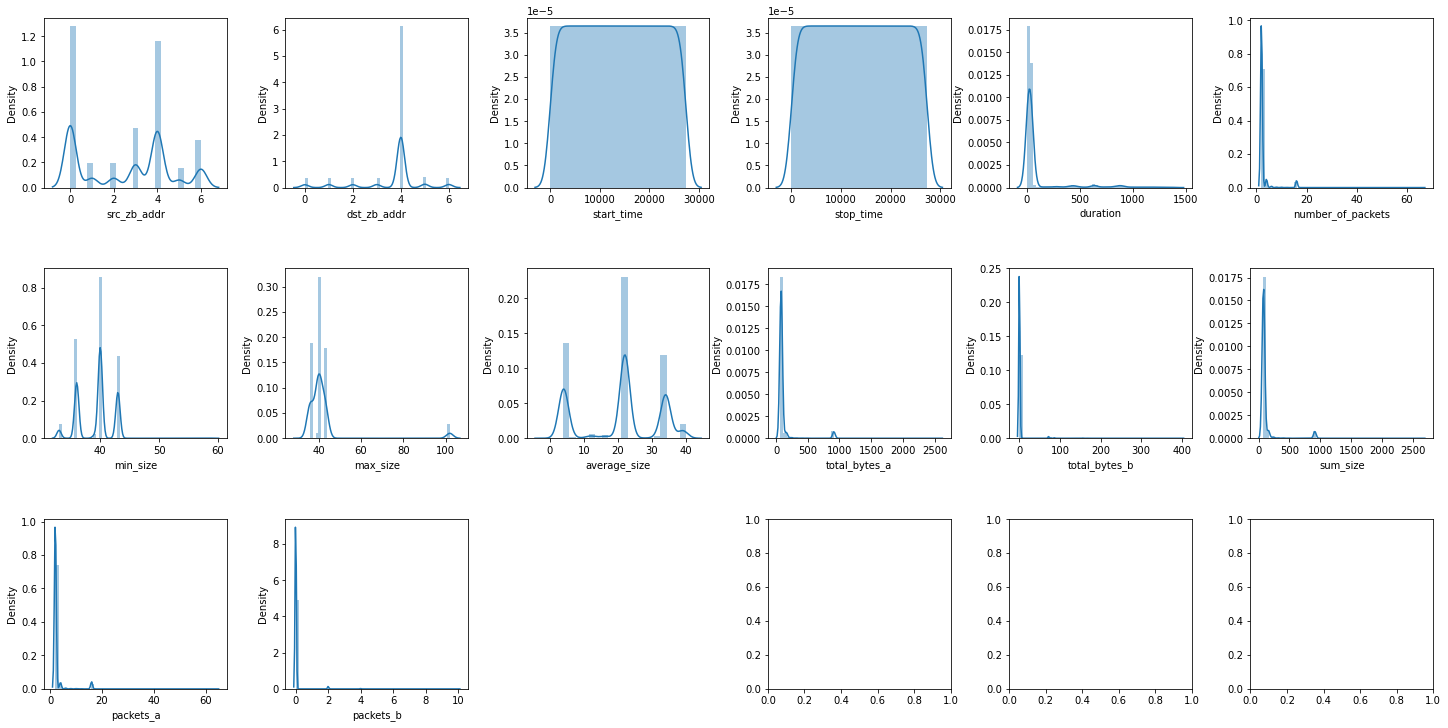

In [47]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [ ]:
### KNeighbors

In [34]:
#%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model1 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model1.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [35]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.81%
Recall: 99.81%
Precision: 99.81%
F1-Score: 99.81%
time to train: 0.07 s
time to predict: 0.48 s
total: 0.55 s


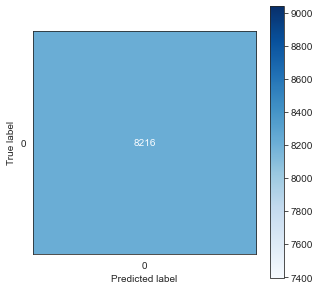

In [52]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model1, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### RandomForest

In [36]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model2 = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model2.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 1.02 s


In [37]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.59%
Recall: 99.59%
Precision: 99.59%
F1-Score: 99.59%
time to train: 0.61 s
time to predict: 0.07 s
total: 0.68 s


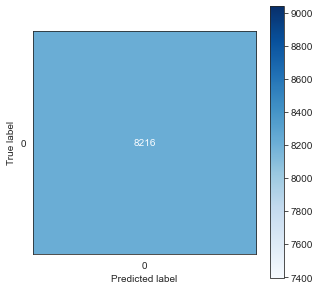

In [55]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [56]:
print('Report:\n',classification_report(y_test, y_predictions))

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8216

    accuracy                           1.00      8216
   macro avg       1.00      1.00      1.00      8216
weighted avg       1.00      1.00      1.00      8216



### DecisionTree

In [38]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model3 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model3.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 39.9 ms


In [39]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.10%
Recall: 98.10%
Precision: 98.15%
F1-Score: 98.08%
time to train: 0.03 s
time to predict: 0.01 s
total: 0.04 s


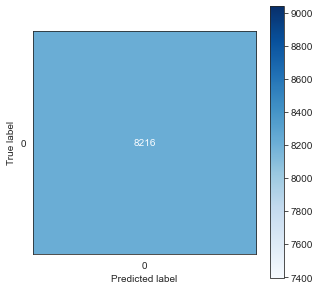

In [59]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model3, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [73]:
### Navie Bayes

In [40]:
#%%time
from sklearn.naive_bayes import MultinomialNB
start = time.time()
model4 = MultinomialNB().fit(X_train,y_train)
end_train = time.time()
y_predictions = model4.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [41]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Naive Bayes'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 57.40%
Recall: 57.40%
Precision: 67.47%
F1-Score: 58.82%
time to train: 0.01 s
time to predict: 0.01 s
total: 0.02 s


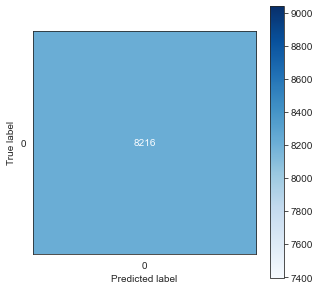

In [62]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model4, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### AdaBoostClassifier

In [42]:
%%time
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
model5 = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model5.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 2.32 s


In [43]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['AdaBoost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.96%
Recall: 99.96%
Precision: 99.96%
F1-Score: 99.96%
time to train: 2.10 s
time to predict: 0.22 s
total: 2.32 s


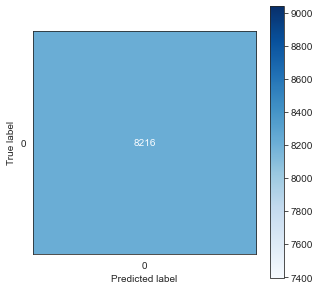

In [65]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model5, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### CAT Boost

In [44]:
%%time
from xgboost import XGBClassifier
start = time.time()
model6 =  XGBClassifier(n_estimators=100, learning_rate=1.0, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model6.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 1.85 s


In [45]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['XG Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.98%
Recall: 99.98%
Precision: 99.98%
F1-Score: 99.98%
time to train: 1.55 s
time to predict: 0.02 s
total: 1.57 s


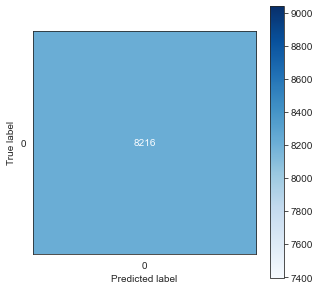

In [68]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model6, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### GradientBoost

In [46]:
%%time
from catboost import CatBoostClassifier
start = time.time()
model7 = CatBoostClassifier(iterations=100).fit(X_train,y_train)
end_train = time.time()
y_predictions = model7.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Learning rate set to 0.300334
0:	learn: 0.4595439	total: 159ms	remaining: 15.8s
1:	learn: 0.3299804	total: 169ms	remaining: 8.28s
2:	learn: 0.2445283	total: 178ms	remaining: 5.75s
3:	learn: 0.1852347	total: 188ms	remaining: 4.51s
4:	learn: 0.1441018	total: 199ms	remaining: 3.77s
5:	learn: 0.1209970	total: 209ms	remaining: 3.28s
6:	learn: 0.0974744	total: 219ms	remaining: 2.91s
7:	learn: 0.0801746	total: 229ms	remaining: 2.64s
8:	learn: 0.0661366	total: 241ms	remaining: 2.43s
9:	learn: 0.0580108	total: 251ms	remaining: 2.26s
10:	learn: 0.0485425	total: 264ms	remaining: 2.13s
11:	learn: 0.0446841	total: 276ms	remaining: 2.02s
12:	learn: 0.0385234	total: 283ms	remaining: 1.89s
13:	learn: 0.0338859	total: 291ms	remaining: 1.78s
14:	learn: 0.0325916	total: 297ms	remaining: 1.68s
15:	learn: 0.0297718	total: 305ms	remaining: 1.6s
16:	learn: 0.0276762	total: 312ms	remaining: 1.52s
17:	learn: 0.0258021	total: 319ms	remaining: 1.45s
18:	learn: 0.0251771	total: 326ms	remaining: 1.39s
19:	learn: 0

In [47]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Cat Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.38%
Recall: 99.38%
Precision: 99.38%
F1-Score: 99.38%
time to train: 1.12 s
time to predict: 0.01 s
total: 1.13 s


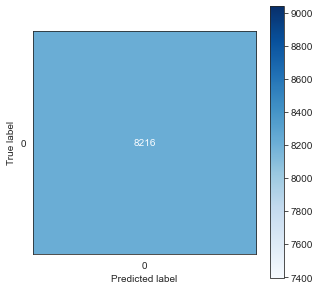

In [72]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model7, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### LinearRegression

In [73]:
#%%time
from sklearn.linear_model import LinearRegression
start = time.time()
model0 = LinearRegression()
model0.fit(X_train,y_train)
end_train = time.time()
y_predictions = model0.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [74]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['LR'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.03 s
time to predict: 0.01 s
total: 0.04 s


In [ ]:
### ExtraTree

In [48]:
from sklearn.feature_selection import mutual_info_classif
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
kNN,99.81%,99.81%,99.81%,99.81%,0.1,0.5,0.5
Random Forest,99.59%,99.59%,99.59%,99.59%,0.6,0.1,0.7
Decision Tree,98.10%,98.10%,98.15%,98.08%,0.0,0.0,0.0
Naive Bayes,57.40%,57.40%,67.47%,58.82%,0.0,0.0,0.0
AdaBoost,99.96%,99.96%,99.96%,99.96%,2.1,0.2,2.3
XG Boost,99.98%,99.98%,99.98%,99.98%,1.5,0.0,1.6
Cat Boost,99.38%,99.38%,99.38%,99.38%,1.1,0.0,1.1
